# Setting Up The DataFrame

In [1]:
# importing the linear algebra library
import numpy as np
# importing data processing library
import pandas as pd

# ignoring warnings that might be generated
import warnings
warnings.filterwarnings("ignore")

#importing the pyplot library from matplotlib
from matplotlib import pyplot as plt

# Explorative Data Analysis

In [2]:
data = pd.read_csv("input/creditcard.csv")
# the creditcard dataset is now a Pandas DataFrame
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.35981,-0.0727812,2.53635,1.3781552243,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.0669281,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.19186,0.266151,0.16648,0.4481540785,0.0600176,-0.0823608,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.16717,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.35835,-1.34016,1.77321,0.379779593,-0.503198,1.8005,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.79299,-0.863291275,-0.0103089,1.2472,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.17558,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.15823,0.877737,1.54872,0.403033934,-0.407193,0.0959215,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.20601,0.502292,0.219422,0.215153,69.99,0


##### we see that the last column class is the categorical variable and all the other columns are either one of Time, Amount or the components that have come after PCA

In [3]:
data.shape

(284909, 31)

##### we see that the data consists of 284909 rows and 31 columns

In [4]:
# to check if there are any NULL values and the data type of all the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284909 entries, 0 to 284908
Data columns (total 31 columns):
Time      284909 non-null int64
V1        284909 non-null object
V2        284909 non-null object
V3        284909 non-null object
V4        284909 non-null object
V5        284909 non-null object
V6        284909 non-null object
V7        284909 non-null float64
V8        284909 non-null float64
V9        284909 non-null float64
V10       284909 non-null float64
V11       284909 non-null float64
V12       284909 non-null float64
V13       284909 non-null float64
V14       284909 non-null float64
V15       284909 non-null float64
V16       284909 non-null float64
V17       284909 non-null float64
V18       284909 non-null float64
V19       284909 non-null float64
V20       284909 non-null float64
V21       284909 non-null float64
V22       284909 non-null float64
V23       284909 non-null float64
V24       284909 non-null object
V25       284909 non-null object
V26       28490

##### we see that there no NULL values present in the data but columns V1-V6 have the type of object where as V7-V28 have the type of object as float64 this could mean that there are non float64 values in columns V1-V6

In [5]:
data['V1'].describe()

count     284909.000000
unique    276489.000000
top            1.245674
freq          77.000000
Name: V1, dtype: float64

In [6]:
data['V7'].describe()

count    284909.000000
mean          0.000171
std           1.238456
min         -43.557242
25%          -0.554068
50%           0.040103
75%           0.570497
max         120.589494
Name: V7, dtype: float64

##### as the describe() function does not give us std, min etc for V1 we will drop the values which are not float64 from those columns

In [7]:
data = data.convert_objects(convert_numeric = True) # we convert all those values which are not float64 to nan

In [8]:
data['V1'].describe() # now the describe should give us the correct result

count    284907.000000
mean         -0.000002
std           1.958611
min         -56.407510
25%          -0.920437
50%           0.018004
75%           1.315678
max           2.454930
Name: V1, dtype: float64

##### now the describe gives us std, min so we know that the values have been converted to nan

In [9]:
data.head() #head of the data with no corrupted values 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284909 entries, 0 to 284908
Data columns (total 31 columns):
Time      284909 non-null int64
V1        284907 non-null float64
V2        284908 non-null float64
V3        284908 non-null float64
V4        284908 non-null float64
V5        284907 non-null float64
V6        284908 non-null float64
V7        284909 non-null float64
V8        284909 non-null float64
V9        284909 non-null float64
V10       284909 non-null float64
V11       284909 non-null float64
V12       284909 non-null float64
V13       284909 non-null float64
V14       284909 non-null float64
V15       284909 non-null float64
V16       284909 non-null float64
V17       284909 non-null float64
V18       284909 non-null float64
V19       284909 non-null float64
V20       284909 non-null float64
V21       284909 non-null float64
V22       284909 non-null float64
V23       284909 non-null float64
V24       284894 non-null float64
V25       284903 non-null float64
V26    

##### there were 284909 rows before

In [11]:
data.dropna(inplace = True) # drop the values which we converted to nan

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284880 entries, 0 to 284907
Data columns (total 31 columns):
Time      284880 non-null int64
V1        284880 non-null float64
V2        284880 non-null float64
V3        284880 non-null float64
V4        284880 non-null float64
V5        284880 non-null float64
V6        284880 non-null float64
V7        284880 non-null float64
V8        284880 non-null float64
V9        284880 non-null float64
V10       284880 non-null float64
V11       284880 non-null float64
V12       284880 non-null float64
V13       284880 non-null float64
V14       284880 non-null float64
V15       284880 non-null float64
V16       284880 non-null float64
V17       284880 non-null float64
V18       284880 non-null float64
V19       284880 non-null float64
V20       284880 non-null float64
V21       284880 non-null float64
V22       284880 non-null float64
V23       284880 non-null float64
V24       284880 non-null float64
V25       284880 non-null float64
V26    

##### now there are 284880 rows. The nan's have been dropped

In [13]:
data.drop_duplicates(inplace = True) # we drop the duplicates from the table.

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283726 entries, 0 to 284807
Data columns (total 31 columns):
Time      283726 non-null int64
V1        283726 non-null float64
V2        283726 non-null float64
V3        283726 non-null float64
V4        283726 non-null float64
V5        283726 non-null float64
V6        283726 non-null float64
V7        283726 non-null float64
V8        283726 non-null float64
V9        283726 non-null float64
V10       283726 non-null float64
V11       283726 non-null float64
V12       283726 non-null float64
V13       283726 non-null float64
V14       283726 non-null float64
V15       283726 non-null float64
V16       283726 non-null float64
V17       283726 non-null float64
V18       283726 non-null float64
V19       283726 non-null float64
V20       283726 non-null float64
V21       283726 non-null float64
V22       283726 non-null float64
V23       283726 non-null float64
V24       283726 non-null float64
V25       283726 non-null float64
V26    

##### we see that the duplicate data have been dropped and now the number of rows is 283726

In [15]:
initialDistribution = data['Class']
import collections
collections.Counter(initialDistribution)

Counter({0: 283253, 1: 473})

### After pre-processing the data we see that there are 473 frauds present and 283253 non fraud transactions

In [16]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


Text(0.5,1,'correlation_matrix_initial')

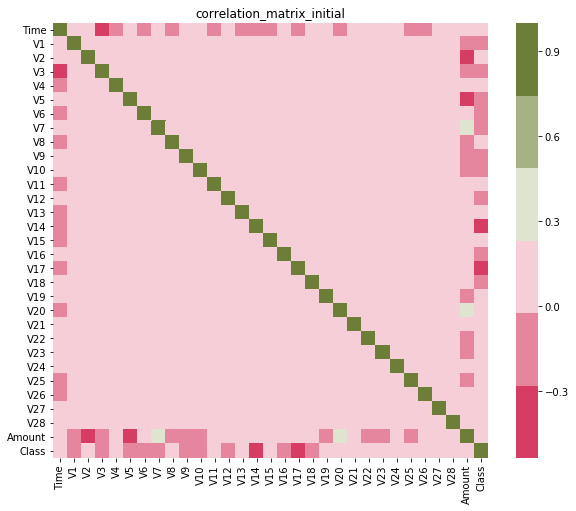

In [17]:
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr,mask = np.zeros_like(corr,dtype = np.bool),cmap = sns.diverging_palette(2,100),square = True, ax=ax)
plt.savefig('Figures/correlation_matrix_initial.jpg')
plt.title('correlation_matrix_initial')

### On generating a heatmap from the seaborn library we see that columns - ‘V1’, ’V3’, ’V5’, ’V6’, ’V7’, ’V9’ ,’V10’, ‘V12’, ‘V14’, ‘V16’, ‘V17’, ‘V18’ have a relatively high correlation with the class column.

In [18]:
seeCorr = data.corr().Class
seeCorr = abs(seeCorr)
seeCorr = seeCorr.sort_values()
seeCorr

V25       0.003202
V15       0.003300
V13       0.003897
V26       0.004265
V22       0.004887
Amount    0.005777
V23       0.006333
V24       0.007210
V28       0.009682
Time      0.012359
V20       0.021486
V27       0.021892
V21       0.026357
V8        0.033068
V19       0.033631
V6        0.043915
V2        0.084624
V5        0.087812
V9        0.094021
V1        0.094486
V18       0.105340
V4        0.129326
V11       0.149067
V7        0.172347
V3        0.182322
V16       0.187186
V10       0.206971
V12       0.250711
V14       0.293375
V17       0.313498
Class     1.000000
Name: Class, dtype: float64

### We also see that columns 'V28', 'V24' ,'V23', 'V22', 'V26', 'V13', 'V15', 'V25', 'Amount' had a correlation of less than 0.01 with the class column. 

Text(0.5,1,'histogram_V17')

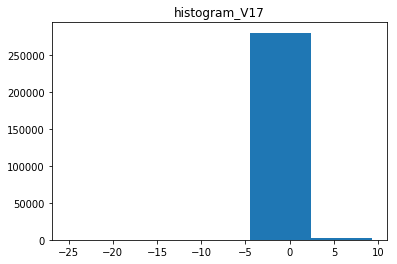

In [19]:
#histogram of the most correlated column
plt.hist(data['V17'],bins=5)
plt.savefig('Figures/histogram_V17.jpg')  # saves the current figure
plt.title('histogram_V17')

Text(0.5,1,'histogram_V14')

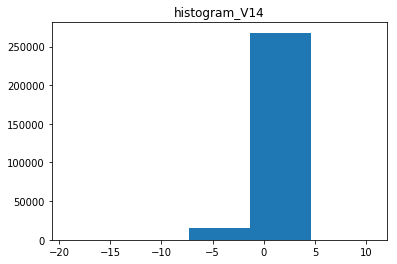

In [20]:
#histogram of the second most correlated column
plt.hist(data['V14'],bins=5)
plt.savefig('Figures/histogram_V14.jpg')
plt.title('histogram_V14')

Text(0.5,1,'histogram_V25')

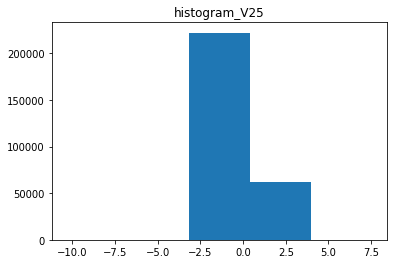

In [21]:
#histogram of the least correlated column
plt.hist(data['V25'],bins=5)
plt.savefig('Figures/histogram_V25.jpg')
plt.title('histogram_V25')

In [22]:
data.drop(['V28','V24','V23','V22','V26','V13','V15','V25','Amount'],axis = 1).head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V12,V14,V16,V17,V18,V19,V20,V21,V27,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.133558,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,1.065235,-0.143772,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.008983,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.066084,-0.165946,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,-0.055353,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.178228,-0.287924,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.062723,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.219422,0


### The columns which had less correlation with the data were dropped

In [23]:
dataC = data.drop(['V28','V24','V23','V22','V26','V13','V15','V25','Amount'],axis = 1)

#### The data was then stored in dataC after dropping the columns

In [24]:
dataC.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V12,V14,V16,V17,V18,V19,V20,V21,V27,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.133558,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,1.065235,-0.143772,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.008983,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.066084,-0.165946,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,-0.055353,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.178228,-0.287924,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.062723,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.219422,0


In [25]:
#info of the dataC DataFrame
dataC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283726 entries, 0 to 284807
Data columns (total 22 columns):
Time     283726 non-null int64
V1       283726 non-null float64
V2       283726 non-null float64
V3       283726 non-null float64
V4       283726 non-null float64
V5       283726 non-null float64
V6       283726 non-null float64
V7       283726 non-null float64
V8       283726 non-null float64
V9       283726 non-null float64
V10      283726 non-null float64
V11      283726 non-null float64
V12      283726 non-null float64
V14      283726 non-null float64
V16      283726 non-null float64
V17      283726 non-null float64
V18      283726 non-null float64
V19      283726 non-null float64
V20      283726 non-null float64
V21      283726 non-null float64
V27      283726 non-null float64
Class    283726 non-null int64
dtypes: float64(20), int64(2)
memory usage: 49.8 MB


Text(0.5,1.05,'correlation_matrix_final')

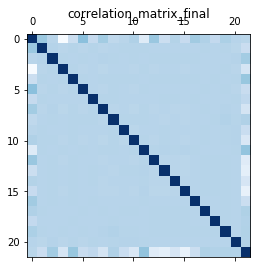

In [26]:
# correlation plot of the dataC dataframe
plt.matshow(dataC.corr(),cmap='Blues')
plt.savefig('Figures/correlation_matrix_final.jpg')
plt.title('correlation_matrix_final')

In [27]:
dataC.drop(['Class'],axis=1).head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V11,V12,V14,V16,V17,V18,V19,V20,V21,V27
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.133558
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.008983
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,-0.055353
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.062723
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.219422


In [28]:
dataWithoutClass = dataC.drop(['Class'],axis=1)
dataWithoutClass.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V11,V12,V14,V16,V17,V18,V19,V20,V21,V27
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.133558
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.008983
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,-0.055353
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.062723
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.219422


### dataWithoutClass is the DataFrame without the class we use this DataFrame to make our clusters

In [29]:
classes = dataC['Class']
classes.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

### classes is a DataSeries of the classes which we will drop

In [30]:
dataWithoutClass.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V11,V12,V14,V16,V17,V18,V19,V20,V21,V27
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,0.000202,-0.000715,0.000252,0.001162,0.000170,0.001515,-0.000264,0.000187,-0.000371,0.001763
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,1.018720,0.994674,0.952215,0.873696,0.842507,0.837378,0.813379,0.769984,0.723909,0.395744
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-4.797473,-18.683715,-19.214325,-14.129855,-25.162799,-9.498746,-7.213527,-54.497720,-34.830382,-22.565679
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.761649,-0.406198,-0.425732,-0.466860,-0.483928,-0.498014,-0.456289,-0.211469,-0.228305,-0.070641
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.032306,0.139072,0.050209,0.067119,-0.065867,-0.002142,0.003367,-0.062353,-0.029441,0.001479
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.739579,0.616976,0.492336,0.523512,0.398972,0.501956,0.458508,0.133207,0.186194,0.091208
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,12.018913,7.848392,10.526766,17.315112,9.253526,5.041069,5.591971,39.420904,27.202839,31.612198


# Data Normalization

### We normalize the data using the MinMaxScaler

In [31]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(dataWithoutClass)
dataN = pd.DataFrame(np_scaled)
dataN.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.000000,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,...,0.252484,0.680908,0.635591,0.434392,0.737173,0.655066,0.594863,0.582942,0.561184,0.418976
1,0.000000,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,...,0.381188,0.744342,0.641219,0.464105,0.727794,0.640681,0.551930,0.579530,0.557840,0.416345
2,0.000006,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,...,0.322422,0.706683,0.640473,0.357443,0.763381,0.644945,0.386683,0.585855,0.565477,0.415489
3,0.000006,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,...,0.271817,0.710910,0.636372,0.415653,0.711253,0.788492,0.467058,0.578050,0.559734,0.417669
4,0.000012,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,...,0.236355,0.724477,0.608406,0.434995,0.724243,0.650665,0.626060,0.584615,0.561327,0.420561


### dataN is the data after normalization

# K-Means Clusterring

### We run the elbow method to see which is the best number of clusters that we should form

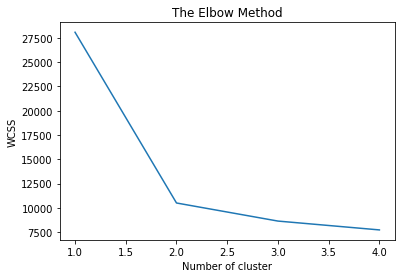

In [32]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,5):
    kmeans = KMeans(n_clusters = i,init = 'k-means++',random_state = 0)
    kmeans.fit(dataN)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,5),wcss)
plt.savefig('Figures/Elbow_Method.jpg')
plt.title('The Elbow Method')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.show()

### The apt number of clusters seem to be two

### We run k-means++ with n_clusters specified as 2

In [33]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 0)
y2_kmeans = kmeans.fit_predict(dataN)

In [34]:
y2_kmeans

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

### y2_kmeans is the result of Kmeans on the normalized data

In [35]:
collections.Counter(y2_kmeans)

Counter({1: 152714, 0: 131012})

### We assume that the cluster with more data points is the non fraudlent data set

In [36]:
if collections.Counter(y2_kmeans)[1] >  collections.Counter(y2_kmeans)[0]:
    y2_kmeans = np.subtract(1,y2_kmeans)
collections.Counter(y2_kmeans)

Counter({0: 152714, 1: 131012})

### We calculate the mean square error for K-Means

In [37]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(initialDistribution, y2_kmeans)
mse

0.4623932949394839

### We calculate the root mean square error for K-Means

In [38]:
from math import sqrt

rms = sqrt(mean_squared_error(initialDistribution,y2_kmeans))
rms

0.6799950697905712

### We calculate the accuracy for K-Means

In [39]:
# data is the actual value and label is the predicted value
def accuracy(data,label):
    true = 0
    false =0
    assert len(data) == len(label)
    for i in range(len(data)):
        if data[i] == label[i]:
            true = true + 1
        else:
            false = false + 1
    val = float(true) / float(true + false)
    
    return val*100

In [40]:
type(classes.values)

numpy.ndarray

In [41]:
type(y2_kmeans)

numpy.ndarray

In [42]:
accuracy(classes.values,y2_kmeans)

53.76067050605161

### We calculate the recall for K-Means

In [43]:
# data is the actual value and label is the predicted value
def recall(data,label):
    true_positive = 0
    false_negative = 0
    assert len(data) == len(label)
    for i in range(len(data)):
        if data[i] == label[i] and data[i] == 1:
            true_positive = true_positive + 1
        elif data[i] == 1 and label[i] == 0:
            false_negative = false_negative + 1
        i = i + 1
    val = float(true_positive) / float(true_positive + false_negative)
    
    return val*100

In [44]:
recall(classes.values,y2_kmeans)

30.866807610993657

### We calculate the precision for K-Means

In [45]:
# data is the actual value and label is the predicted value
def precision(data,label):
    true_positive = 0
    false_positive = 0
    assert len(data) == len(label)
    for i in range(len(data)):
        if data[i] == label[i] and data[i] == 1:
            true_positive = true_positive + 1
        elif data[i] == 0 and label[i] == 1:
            false_positive = false_positive + 1
    val = float(true_positive) / float(true_positive + false_positive)
    
    return val*100

In [46]:
precision(classes.values,y2_kmeans)

0.11144017341922878

### We calculate the correlation between the predicted and the actual values

In [47]:
np.corrcoef(classes.values,y2_kmeans)

array([[ 1.        , -0.01254835],
       [-0.01254835,  1.        ]])

In [48]:
from scipy.stats.stats import pearsonr 
pearsonr(classes.values,y2_kmeans)

(-0.012548348944478068, 2.3214310851033283e-11)

# Principle Component Analysis

In [49]:
# we calculate the two main principle components
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(dataN)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf.head()

,principal component 1,principal component 2
0,0.548748,-0.035054
1,0.552208,0.004961
2,0.552592,0.172197
3,0.544321,0.097107
4,0.544669,-0.063663


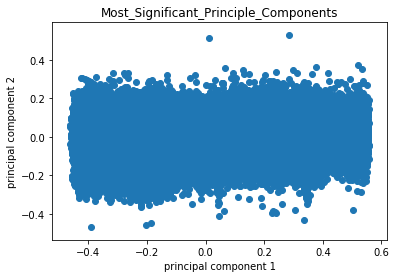

In [50]:
plt.scatter(principalDf.iloc[:,0:1], principalDf.iloc[:,1:2])
plt.xlabel(principalDf.columns.values[0])
plt.ylabel(principalDf.columns.values[1])
plt.savefig('Figures/Most_Significant_Principle_Components.jpg')
plt.title('Most_Significant_Principle_Components')
plt.show()


### The data appears to be quite Density based. There seems to be a huge cluster and all the points far away from these clusters seem to be anomalies. Here we infer that Density based clustering should be the most appropriate for this dataset. However the dataset appears to be huge and DBSCAN does not run on the dataset as the kernel dies quickly. 



# Hence we finish our analysis